<a href="https://colab.research.google.com/github/cute23333/learngit/blob/master/youhua.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

----------引入库------------

In [1]:
import os

In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

-------修改路径到工作目录-----------

In [3]:
os.chdir(r'drive/MyDrive/Colab Notebooks/信号大作业')

In [4]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/信号大作业'

----正式代码-------------

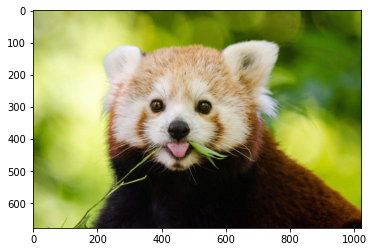

In [56]:
#读入图片
image = cv2.imread('bear.jpg')
plt.imshow(image[:,:,::-1])
plt.show()

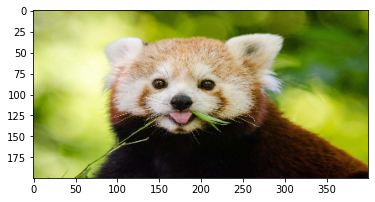

In [57]:
#resize，实质上是插值
image = cv2.resize(image,(400,200))
plt.imshow(image[:,:,::-1])
plt.show()

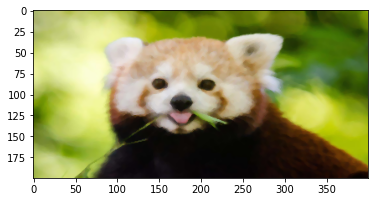

In [58]:
#中值滤波：模糊图像
#多模糊几次
image_cleared = cv2.medianBlur(image,3)
for i in range(3):
  image_cleared = cv2.medianBlur(image_cleared,3)
plt.imshow(image_cleared[:,:,::-1])
plt.show()

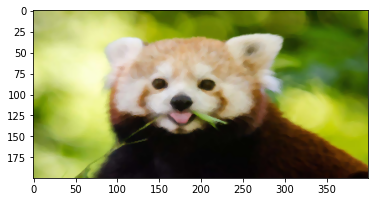

In [59]:
#双边滤波，保留边缘，去除噪声
image_filtered = cv2.bilateralFilter(image_cleared,3,10,5)
plt.imshow(image_filtered[:,:,::-1])
plt.show()

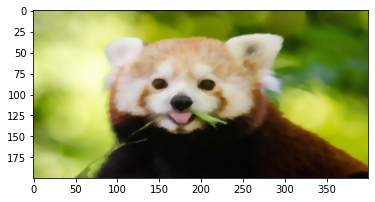

In [60]:
#继续滤波，多滤几次
for i in range(3):
  image_filtered = cv2.bilateralFilter(image_filtered,3,20,10)
plt.imshow(image_filtered[:,:,::-1])
plt.show()

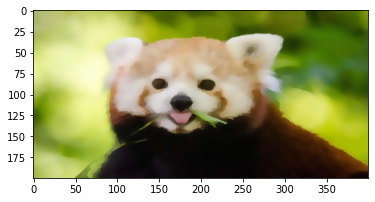

In [61]:
#继续滤波.图片会越来越块状
for i in range(3):
  image_filtered = cv2.bilateralFilter(image_filtered,5,30,10)
plt.imshow(image_filtered[:,:,::-1])
plt.show()

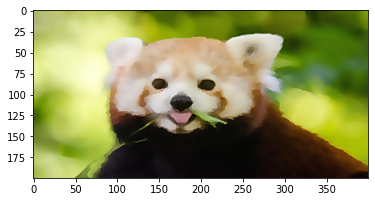

In [62]:
#图像锐化：将高斯模糊的图片与原图以1.5:-0.5比例相加，最后一个参数控制亮度
#边缘更清晰，图片变亮
gaussian_mask = cv2.GaussianBlur(image_filtered,(7,7),2)
image_sharp = cv2.addWeighted(image_filtered,1.5,gaussian_mask,-0.5,2)
plt.imshow(image_sharp[:,:,::-1])
plt.show()

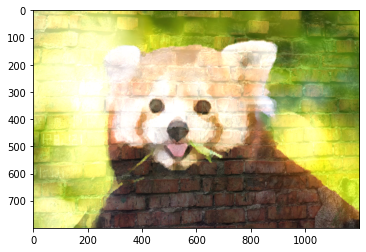

In [63]:
#将画涂在墙上
wall = cv2.imread("wall2.jpg",cv2.IMREAD_ANYCOLOR)

#add - 墙的权重小一些
imgadd = cv2.addWeighted(cv2.resize(image_sharp,(1200,800)),1,cv2.resize(wall,(1200,800)),0.5,5)
plt.imshow(imgadd[:,:,::-1])
plt.show()